In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from matplotlib.lines import Line2D
import sys
sys.path.insert(0, '..')

plt.style.use('default')

In [2]:
group = ['stroke', 'intact']
tinfo = pd.read_csv('../data/baseline/tinfo.tsv', sep='\t')
log_training = pd.DataFrame()
mapping = ['on', 'off']
for gr in group:
    for map in mapping:
        for sn in tinfo.subj_id.unique():
            log = pd.read_csv(f'../data/controller_training/log_training.{map}-manifold.{gr}.{sn}.tsv', sep='\t')
            log_ds = log[::10]
            log_training = pd.concat([log_training, log_ds])

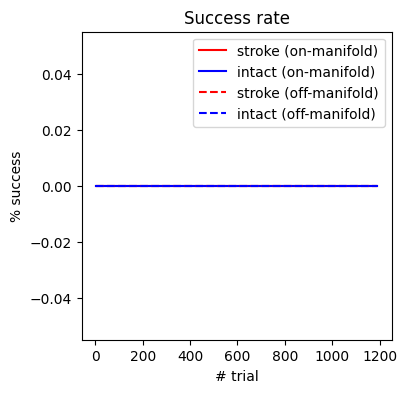

In [3]:
fig, ax = plt.subplots(figsize=(4, 4))

onm = log_training.mapping == 'on'
metric = 'success'
sb.lineplot(ax=ax, data=log_training[onm], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], err_kws={'lw': 0})
sb.lineplot(ax=ax, data=log_training[~onm], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], ls='--', err_kws={'lw': 0})
ax.set_title('Success rate')
ax.set_ylabel('% success')
ax.set_xlabel('# trial')
clines = [Line2D([0], [0], color='red',),
    Line2D([0], [0], color='blue',),
    Line2D([0], [0], color='red', ls='--'),
    Line2D([0], [0], color='blue', ls='--')]
ax.legend(clines, ['stroke (on-manifold)', 'intact (on-manifold)', 'stroke (off-manifold)', 'intact (off-manifold)'])

plt.show()

/var/folders/s3/hg3x_gkd20116_zy9njtj8qw0000gn/T/ipykernel_85266/1318381874.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(ax=ax, data=log_training[onm & success], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], err_kws={'lw': 0})
/var/folders/s3/hg3x_gkd20116_zy9njtj8qw0000gn/T/ipykernel_85266/1318381874.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(ax=ax, data=log_training[~onm & success], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], ls='--', err_kws={'lw': 0})


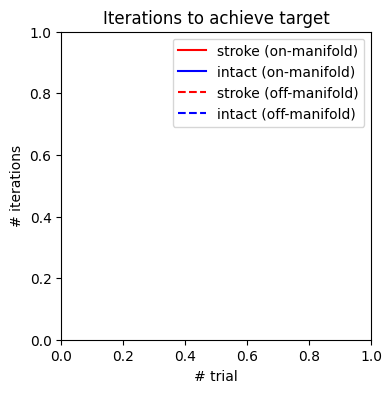

In [4]:
fig, ax = plt.subplots(figsize=(4, 4))

onm = log_training.mapping == 'on'
success = log_training.success == True
metric = 'nsteps'
sb.lineplot(ax=ax, data=log_training[onm & success], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], err_kws={'lw': 0})
sb.lineplot(ax=ax, data=log_training[~onm & success], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], ls='--', err_kws={'lw': 0})
ax.set_title('Iterations to achieve target')
ax.set_ylabel('# iterations')
ax.set_xlabel('# trial')
clines = [Line2D([0], [0], color='red',),
    Line2D([0], [0], color='blue',),
    Line2D([0], [0], color='red', ls='--'),
    Line2D([0], [0], color='blue', ls='--')]
ax.legend(clines, ['stroke (on-manifold)', 'intact (on-manifold)', 'stroke (off-manifold)', 'intact (off-manifold)'])

plt.show()

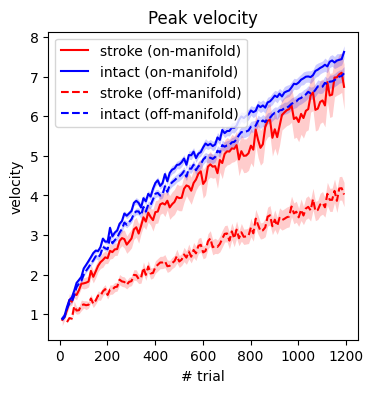

In [48]:
fig, ax = plt.subplots(figsize=(4, 4))

onm = log_training.mapping == 'on'
success = log_training.success == True
metric = 'velMax'
sb.lineplot(ax=ax, data=log_training[onm & success], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], err_kws={'lw': 0})
sb.lineplot(ax=ax, data=log_training[~onm & success], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], ls='--', err_kws={'lw': 0})
ax.set_title('Peak velocity')
ax.set_ylabel('velocity')
ax.set_xlabel('# trial')
clines = [Line2D([0], [0], color='red',),
    Line2D([0], [0], color='blue',),
    Line2D([0], [0], color='red', ls='--'),
    Line2D([0], [0], color='blue', ls='--')]
ax.legend(clines, ['stroke (on-manifold)', 'intact (on-manifold)', 'stroke (off-manifold)', 'intact (off-manifold)'])

plt.show()

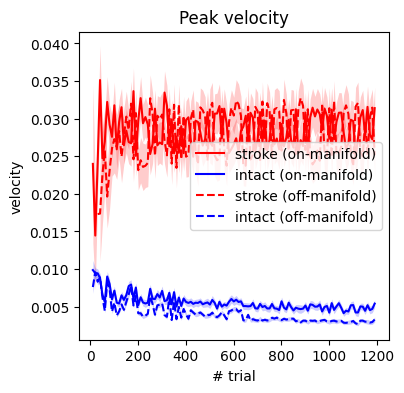

In [49]:
fig, ax = plt.subplots(figsize=(4, 4))

onm = log_training.mapping == 'on'
success = log_training.success == True
metric = 'meanDev'
sb.lineplot(ax=ax, data=log_training[onm & success], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], err_kws={'lw': 0})
sb.lineplot(ax=ax, data=log_training[~onm & success], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], ls='--', err_kws={'lw': 0})
ax.set_title('Peak velocity')
ax.set_ylabel('velocity')
ax.set_xlabel('# trial')
clines = [Line2D([0], [0], color='red',),
    Line2D([0], [0], color='blue',),
    Line2D([0], [0], color='red', ls='--'),
    Line2D([0], [0], color='blue', ls='--')]
ax.legend(clines, ['stroke (on-manifold)', 'intact (on-manifold)', 'stroke (off-manifold)', 'intact (off-manifold)'])

plt.show()

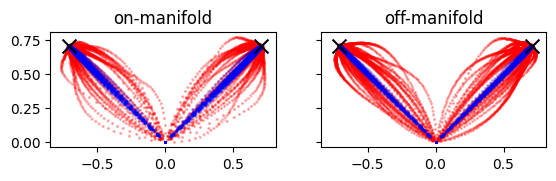

In [44]:
from training import simulate_trial, calc_manifold, reshape_off_manifold

dataset = ['stroke', 'intact']
d = 5
N = 30

ang = np.array([.25, .75]) * np.pi
pos_star = np.array([np.cos(ang), np.sin(ang)])

fig, axs = plt.subplots(1, 2, sharey=True, sharex=True)

for ax in axs:
    ax.scatter(pos_star[0], pos_star[1], s=100, color='k', marker='x', zorder=1e6)
    ax.set_aspect('equal')

for map in mapping:
    for ds in dataset:
        for sn in range(N):

            ax = axs[0 if map == 'on' else 1]
            ax.set_title(f'{map}-manifold')

            #F = np.load(f'../data/post_rehab/single_finger.pretraining.{ds}.{sn+100}.npy')
            #A = np.load(f'../data/post_rehab/basis_vectors.{ds}.{sn+100}.npy')
            A = np.load(f'../data/post_rehab/basis_vectors.{map}-manifold.{ds}.{sn+100}.npy')
            W_dec = np.load(f'../data/controller_training/W_dec.{ds}.{sn+100}.npy')
            W_pol = np.load(f'../data/post_rehab/W_pol.{map}-manifold.{ds}.{sn+100}.npy')
            B = np.load(f'../data/post_rehab/B.{map}-manifold.{ds}.{sn+100}.npy')
            Nc, K = A.shape
            #W_pol = np.zeros((K, 2))
            traj = []
            for i in range(6):
                traj, _ = simulate_trial(A, B, W_dec, W_pol, ang=ang[i % 2])
                ax.scatter(traj[:, 0],
                            traj[:, 1],
                            alpha=.1, marker='.', edgecolor=None, s=5,
                            color='r' if ds == 'stroke' else 'b',)
